# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# data Loading

In [47]:
data_path = "https://raw.githubusercontent.com/DriveMyScream/Multiple_Stock_Price_Prediction/main/Tether%20Historical%20Data%20-%20Investing.com%20India.csv"
dataset = pd.read_csv(data_path, parse_dates=['Date'])
dataset.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-05-15,1.0004,1.0004,1.0008,1.0003,11.95M,0.01%
1,2023-05-14,1.0004,1.0006,1.0009,1.0003,25.15M,-0.02%
2,2023-05-13,1.0006,1.0006,1.0011,1.0004,26.71M,0.00%
3,2023-05-12,1.0006,1.0005,1.0012,1.0003,91.05M,0.01%
4,2023-05-11,1.0005,1.0007,1.0011,1.0003,95.41M,-0.02%


In [48]:
dataset = dataset[::-1]
dataset.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
1959,2018-01-01,1.01,1.02,1.03,1.0100,1.62M,-0.98%
1958,2018-01-02,1.02,1.01,1.02,1.0100,915.82K,0.99%
1957,2018-01-03,1.01,1.02,1.02,1.0000,1.09M,-0.98%
1956,2018-01-04,1.02,1.01,1.02,1.0100,2.31M,0.99%
1955,2018-01-05,1.00,1.02,1.02,0.9993,3.27M,-1.96%


In [49]:
def parse_float(string_value):
  cleaned_string = string_value.replace(",", "")
  float_value = float(cleaned_string)
  return float_value

In [50]:
dataset['Open'] = dataset['Open'].astype(str).apply(parse_float)
dataset['High'] = dataset['High'].astype(str).apply(parse_float)
dataset['Low'] = dataset['Low'].astype(str).apply(parse_float)
dataset['Price'] = dataset['Price'].astype(str).apply(parse_float)

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 1959 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1960 non-null   datetime64[ns]
 1   Price     1960 non-null   float64       
 2   Open      1960 non-null   float64       
 3   High      1960 non-null   float64       
 4   Low       1960 non-null   float64       
 5   Vol.      1960 non-null   object        
 6   Change %  1960 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 107.3+ KB


In [52]:
dataset.describe()

,Price,Open,High,Low
count,1960.000000,1960.000000,1960.000000,1960.000000
mean,1.000142,1.000774,1.091495,0.998707
std,0.005277,0.005724,3.911588,0.006909
min,0.950600,0.950600,0.973300,0.871800
25%,0.999900,1.000000,1.000500,0.999000
50%,1.000300,1.000400,1.001200,0.999900
75%,1.001200,1.001600,1.004000,1.000500
max,1.030000,1.045700,174.176300,1.021300


In [53]:
dataset.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

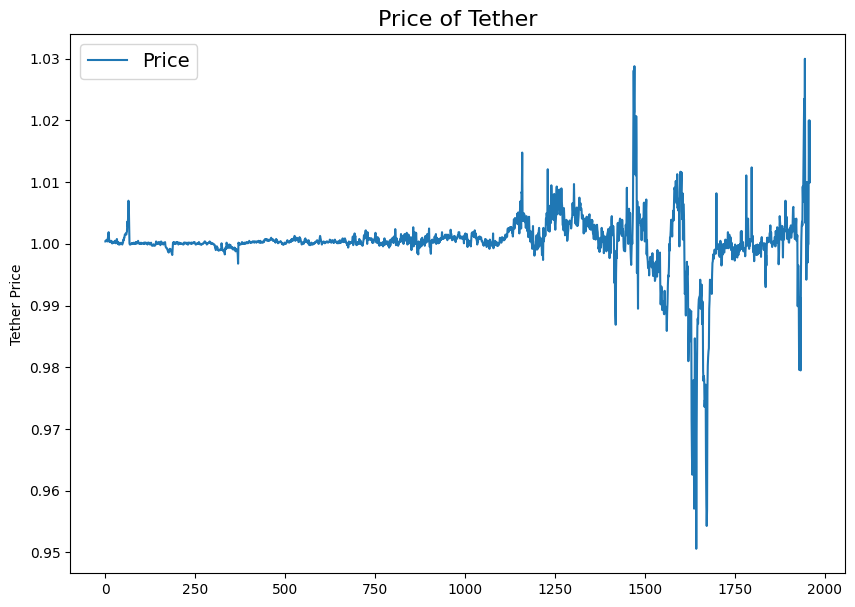

In [58]:
import matplotlib.pyplot as plt
dataset['Price'].plot(figsize=(10, 7))
plt.ylabel("Tether Price")
plt.title("Price of Tether", fontsize=16)
plt.legend(fontsize=14);

In [59]:
price_data = dataset['Price'].values
price_data

array([1.01  , 1.02  , 1.01  , ..., 1.0006, 1.0004, 1.0004])

In [60]:
price_data.shape

(1960,)

In [61]:
train_data, test_data = price_data[0:1800], price_data[1800:]

In [62]:
train_data.shape, test_data.shape

((1800,), (160,))

In [63]:
def windowed_dataset(series, time_step):
    dataX, dataY = [], []
    for i in range(len(series) - time_step - 1):
        a = series[i : i + time_step]  # Remove the indexing with ", 0"
        dataX.append(a)
        dataY.append(series[i + time_step])
        
    return np.array(dataX), np.array(dataY)

In [64]:
X_train, y_train = windowed_dataset(train_data, time_step=7)
X_test, y_test = windowed_dataset(test_data, time_step=7)

In [65]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1792, 7), (1792,), (152, 7), (152,))

In [66]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape) 
print(X_test.shape)

(1792, 7, 1)
(152, 7, 1)


In [67]:
X_train[0]

array([[1.01 ],
       [1.02 ],
       [1.01 ],
       [1.02 ],
       [1.   ],
       [1.   ],
       [0.997]])

In [68]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [69]:
# Create the LSTM model
model = models.Sequential()

model.add(layers.Input(shape = (7, 1), dtype=tf.float32))
# Add the Normalization layer
model.add(layers.Normalization())

# Specify the mean and variance for normalization
model.layers[0].adapt(X_train)

model.add(layers.LSTM(units=100, activation='relu', return_sequences=True))
model.add(layers.Dropout(0.3))

model.add(layers.LSTM(units=50, activation='relu', return_sequences=True))
model.add(layers.Dropout(0.4))

model.add(layers.LSTM(units=10, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=1))

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 7, 1)             3         
 ion)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 7, 100)            40800     
                                                                 
 dropout_3 (Dropout)         (None, 7, 100)            0         
                                                                 
 lstm_4 (LSTM)               (None, 7, 50)             30200     
                                                                 
 dropout_4 (Dropout)         (None, 7, 50)             0         
                                                                 
 lstm_5 (LSTM)               (None, 10)                2440      
                                                      

In [71]:
model.compile(optimizer = 'adamax', loss = 'mse', metrics = 'mae')

In [72]:
# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 30, batch_size = 32, verbose=1, shuffle=False)

Epoch 1/30
51/51 [==============================] - 6s 29ms/step - loss: 0.6857 - mae: 0.8106 - val_loss: 0.1113 - val_mae: 0.3321
Epoch 2/30
51/51 [==============================] - 1s 17ms/step - loss: 0.6990 - mae: 0.4387 - val_loss: 0.1782 - val_mae: 0.4216
Epoch 3/30
51/51 [==============================] - 1s 18ms/step - loss: 0.3379 - mae: 0.4058 - val_loss: 0.1634 - val_mae: 0.4038
Epoch 4/30
51/51 [==============================] - 2s 38ms/step - loss: 0.2613 - mae: 0.3755 - val_loss: 0.1299 - val_mae: 0.3600
Epoch 5/30
51/51 [==============================] - 2s 43ms/step - loss: 0.1784 - mae: 0.3193 - val_loss: 0.0928 - val_mae: 0.3042
Epoch 6/30
51/51 [==============================] - 2s 30ms/step - loss: 0.2058 - mae: 0.2943 - val_loss: 0.0644 - val_mae: 0.2533
Epoch 7/30
51/51 [==============================] - 2s 34ms/step - loss: 0.1408 - mae: 0.2617 - val_loss: 0.0380 - val_mae: 0.1944
Epoch 8/30
51/51 [==============================] - 1s 24ms/step - loss: 0.1602 - m

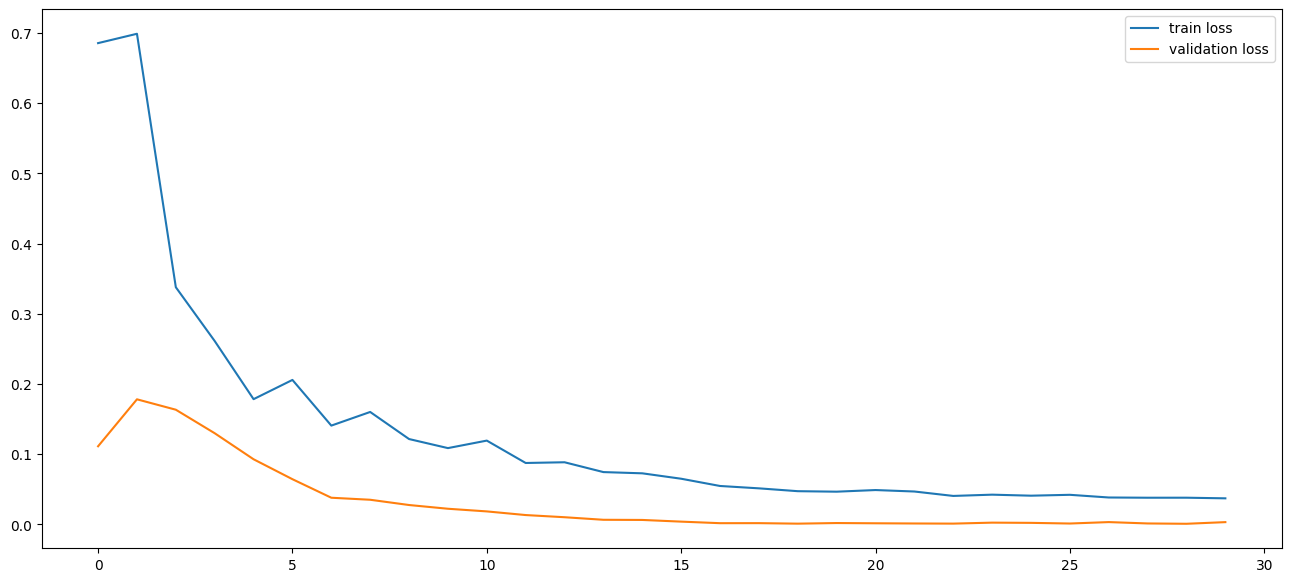

In [73]:
plt.figure(figsize=(16,7))
plt.plot(history.history["loss"], label= "train loss")
plt.plot(history.history["val_loss"], label= "validation loss")
plt.legend();

In [74]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

5/5 [==============================] - 0s 5ms/step


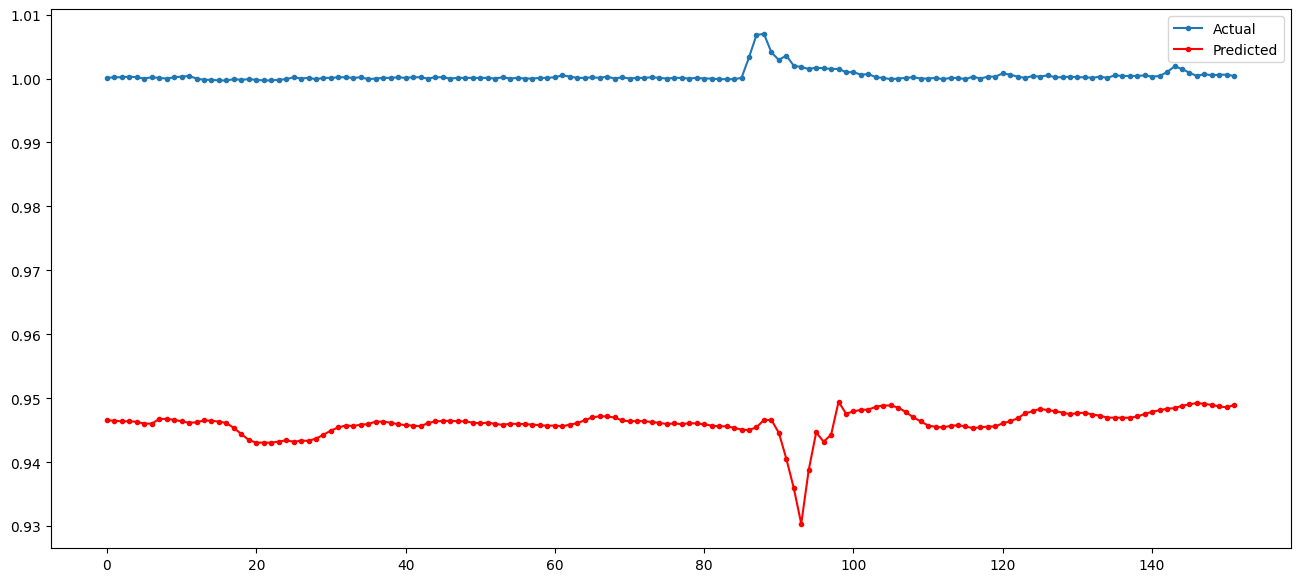

In [75]:
plt.figure(figsize=(16,7))
plt.plot(y_test.flatten(), marker='.', label="Actual")
plt.plot(test_predict.flatten(), 'r', marker='.', label="Predicted")
plt.legend();

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
test_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))
test_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))


print(f"Train RMSE: {train_RMSE}")
print(f"Train MAE: {train_MAE}")

print(f"Test RMSE: {test_RMSE}")
print(f"Test MAE: {test_MAE}")

Train RMSE: 0.05811312887237595
Train MAE: 0.23867195742714728
Test RMSE: 0.05440708941715951
Test MAE: 0.23312531396277636


# at Inference

In [77]:
model.save("Tether_Price_Prediction")

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
model = tf.keras.saving.load_model("/content/Tether_Price_Prediction")

In [79]:
%cp -av /content/Tether_Price_Prediction /content/drive/MyDrive/Multiple_Stock_Price_Prediction

'/content/Tether_Price_Prediction' -> '/content/drive/MyDrive/Multiple_Stock_Price_Prediction/Tether_Price_Prediction'
'/content/Tether_Price_Prediction/variables' -> '/content/drive/MyDrive/Multiple_Stock_Price_Prediction/Tether_Price_Prediction/variables'
'/content/Tether_Price_Prediction/variables/variables.data-00000-of-00001' -> '/content/drive/MyDrive/Multiple_Stock_Price_Prediction/Tether_Price_Prediction/variables/variables.data-00000-of-00001'
'/content/Tether_Price_Prediction/variables/variables.index' -> '/content/drive/MyDrive/Multiple_Stock_Price_Prediction/Tether_Price_Prediction/variables/variables.index'
'/content/Tether_Price_Prediction/assets' -> '/content/drive/MyDrive/Multiple_Stock_Price_Prediction/Tether_Price_Prediction/assets'
'/content/Tether_Price_Prediction/fingerprint.pb' -> '/content/drive/MyDrive/Multiple_Stock_Price_Prediction/Tether_Price_Prediction/fingerprint.pb'
'/content/Tether_Price_Prediction/saved_model.pb' -> '/content/drive/MyDrive/Multiple_Stoc

In [44]:
X_test[0].shape

(7, 1)

In [80]:
prices = np.array([[1.01 ],
       [1.02 ],
       [1.01 ],
       [1.02 ],
       [1.   ],
       [1.   ],
       [0.997]])

prices = prices.reshape(1, -1, 1)
prediction_price = model.predict(prices)
prediction_price = prediction_price[0][0]
print("Prediction Price: ", prediction_price)

1/1 [==============================] - 0s 465ms/step
Prediction Price:  1.0151393


In [81]:
print("Predicted Tether Price: {0:.2f} ".format(prediction_price))

Predicted Tether Price: 1.02 
